In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Data

$\mathbf{X}$ is a feature matrix corresponding to $n$ training examples, each represented with $d$ features and has shape $d \times n$.  
\begin{equation}
  \mathbf{X}_{d \times n} = \begin{bmatrix}
       | & | &\dots & |\\
       \mathbf{x}_{1}&  
       \mathbf{x}_{2} &
      \dots &
       \mathbf{x}_{n}  \\
        | & | &\dots & |\\
    \end{bmatrix}
\end{equation}

* here each $\mathbf{x}_i \in \mathbb{R}^d$

*  $\mathbf{y}$ is a label vector of shape $n \times 1$.  
\begin{equation}
    \mathbf{y} = \begin{bmatrix}
        y_{1}  \\
        y_{2} \\
        \vdots  \\
        y_{n} \\
      \end{bmatrix}
\end{equation}

*  The $i$-th entry in this vector, $\mathbf{y}[i]$ gives label for $i$-th example, which is denoted by $y_{i} \in \mathbb{R}$.

### Training data

In [ ]:
## Training Data
rng = np.random.default_rng(seed = 101)
X_train = (np.arange(-2, 2, 0.01).reshape(1, -1))
y_train = (2*X_train**3+3*X_train**2 +4 + rng.normal(0, 1, X_train.shape[1]).reshape(1, -1)).T


In [ ]:
X_train.shape, y_train.shape

((1, 400), (400, 1))

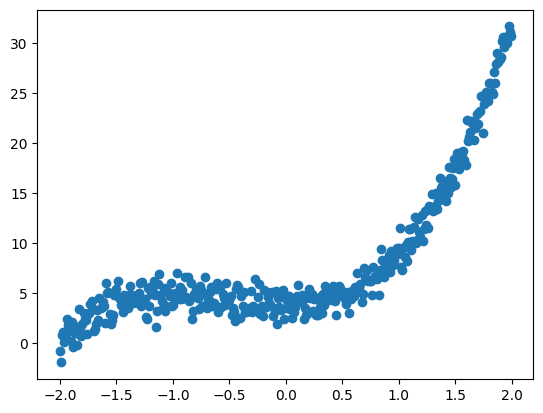

In [ ]:
plt.scatter(X_train, y_train)

### Test data

In [ ]:
### Test data
rng = np.random.default_rng(seed = 102)
X_test = np.arange(-2, 2, 0.02).reshape(1, -1)
y_test = (2*X_test**3+3*X_test**2 +4 + rng.normal(0, 2, X_test.shape[1]).reshape(1, -1)).T

## Model

Linear regression model for the dataset ${\mathbb{x}, y}$ is given as
$$h_w(\mathbb{x}) = w_1x^{1}+w_2x^{2}+...+w_dx^{d} =  \mathbf{x}^Tw
$$

where $x^{i}$ is the $i^{th}$ feature of the data point $\mathbf{x}$ and $w = [w_1, w_2, ...w_d]^T$ is the weight vector.


Notice that above model always pass through the origin but for a given dataset, best fit model need not pass through the origin. To tackle this issue, we add an intercept $w_0$ in the model and set the corresponding featrue $x^{0}$ to $1$. That is

$$h_w(\mathbb{x}) =w_0x^{0}+ w_1x^{1}+w_2x^{2}+...+w_dx^{n} =  \mathbf{x}^Tw
$$

We call $x^{0}$ the dummy feature and set its value to 1 for each examples. Now $w$ is of shape $(d+1, 1)$ and $\mathbf{X}$ is of shape $(d+1, n)$ where the first row of $\mathbf{X}$ has entries as 1.


### Add dummy feature

In [ ]:
## Adding dummy feature
dummy_feature = np.ones(X_train.shape[1])
X = np.row_stack((dummy_feature, X_train))
X_t = np.row_stack((np.ones(X_test.shape[1]), X_test))

In [ ]:
X.shape

(2, 400)

## Loss function

The total loss is the sum of square of errors between actual and predicted labels for each training point.  

The error for $i$-th training point is calculated as follows:
\begin{eqnarray}
e^{(i)} &=& (\mathrm{{actual\ label} - {predicted\ label}})^2 \\
        &=& \left ({y_{i}} -
        {h_{\mathbf{w}}(\mathbf{x}_{i})} \right)^2 \\
        &=& \left ({y_{i}} -
        {\mathbf{w}^T \mathbf{x}_{i}} \right)^2
\end{eqnarray}



The total loss $L(\mathbf{w})$ is sum of errors at each training point:
\begin{equation}
L(\mathbf{w}) = \sum_{i=1}^{n} e^{(i)}
\end{equation}

We divide this by $\frac{1}{2}$ for mathematical convenience in later use:


\begin{eqnarray}
  L(\mathbf{w}) &=& \frac{1}{2} \sum_{i=1}^{n} e^{(i)} \\ &=&  \frac{1}{2} \left({{\mathbf{X}^T \mathbf{w}}} - \mathbf{y} \right)^T \left({{\mathbf{X}^T \mathbf{w}}} - \mathbf{y} \right))
\end{eqnarray}


## Optimization



#### 1. Normal equation

Let's set $\dfrac{\partial L(\mathbf{w})}{\partial \mathbf{w}}$ to 0 and solve for $\mathbf{w}$:
\begin{eqnarray}
\frac{\partial L(\mathbf{w})}{\partial \mathbf{w}} &=& \mathbf{X} \mathbf{X}^T \mathbf{w} - \mathbf{X} \mathbf{y} = 0 \\
\mathbf{X}^T \mathbf{X} \mathbf{w} &=& \mathbf{X}^T \mathbf{Y} \\
\mathbf{w} &=& \left( \mathbf{X} \mathbf{X}^T \right)^{-1} \mathbf{X} \mathbf{y}
\end{eqnarray}



#### Find weight vector and prediction for training and test dataset

In [ ]:
## Weights using normal equation
def weights(X, y):
  return (np.linalg.pinv(X@(X.T)))@X@y

In [ ]:
w = weights(X, y_train)

In [ ]:
## Prediction
def predict(X, w):
  return (X.T)@w

In [ ]:
y_hat = predict(X, w)

### Plot weight vector

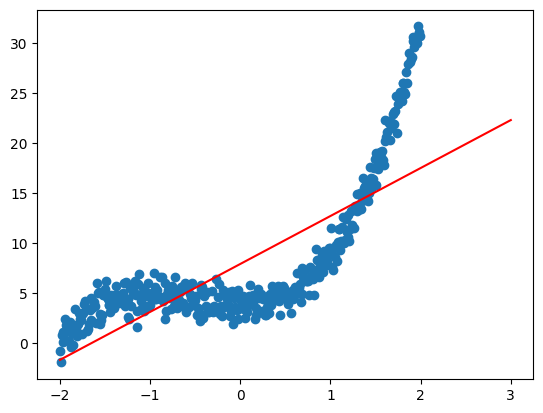

In [ ]:
plt.scatter(X_train, y_train)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = w[0]+w[1]*x_vals
plt.plot(x_vals, y_vals, 'r-')

In [ ]:
np.array(axes.get_xlim())

array([-2.41895,  2.40895])

## Evaluation

##### RMSE $$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$



In [ ]:
## RMSE Loss
def loss(y, yhat):
  return np.sqrt(np.mean((y-yhat)**2))

In [ ]:
loss(y_train, y_hat)

4.477002001803876

In [ ]:
y_test_hat = predict(X_t, w)
loss(y_test, y_test_hat)

4.718639896481515

#### 2. Gradient Descent


Gradient of a function $f$ at a point $x$ gives the direction of maximum change in $f$ at the point $x$.

---

We start at a random point $\mathbf{w}$ at the loss function $L(\mathbf{w})$.


We basically need an update rule in gradient descent, which is as follows:

\begin{eqnarray}
\mathbf{w}_{k+1} &:=& \mathbf{w}_k - \alpha{\frac{\partial L(\mathbf{w})}{\partial \mathbf{w}}} \\
   &:=& \mathbf{w}_k - \alpha{\left(\mathbf{X} \mathbf{X}^T \mathbf{w}_{k} - \mathbf{X} \mathbf{y}\right)} \\
\end{eqnarray}

Note that this is the vectorized implementation.  It will make sure that all the parameters are updated in one go through this.


In [ ]:
## gradient of the loss function
def gradient(X, w, y):
  return (X@X.T)@w-(X@y)

In [ ]:
## Update using gradient descent
def GradDesc(X, y, eta, n_iter):
  w0 = np.zeros(X.shape[0])
  for i in range(n_iter):
    w0 = w0- eta*(gradient(X, w0, y))
  return w0

In [ ]:
w_gd = GradDesc(X, y_train, 0.0001, 10)
y_gd_hat = predict(X, w_gd)
loss(y_gd_hat, y_train)

7.626570571263254

### Number of iterations vs loss (for fixed alpha)

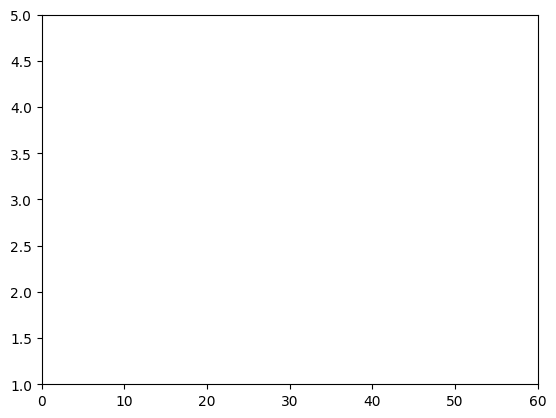

In [ ]:
iter = [1, 5, 10,20,40, 50]
# eta_lst = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
w_lst = []
lss = []
for i in iter:
  w_g = GradDesc(X, y_train, 0.01, i)
  y_g_h = predict(X, w_g)
  ls = loss(y_train, y_g_h)
  w_lst.append(w_g)
  lss.append(ls)

plt.axis([0, 60, 1, 5])
plt.plot(iter, lss)

###9 SGD:



In [ ]:
## Stochastic gradient descent
def SGD(X, y, eta, n_iter):
  w0 = np.zeros(X.shape[0])
  for i in range(n_iter):
    rng = np.random.default_rng(seed = i)
    indices = rng.integers(0, X.shape[1], size = X.shape[1]//5)
    X1 = X[:, indices]
    y1 = y[indices]
    w0 = w0- eta*(gradient(X1, w0, y1))
  return w0

## Kernel Regression



* The optimal weight vector can be written as linear combination of data points.

---

Let $\phi$ be the trainsformation mapping that trasforms the $d$-dimensional data points to $D$-dimension.

$$\phi: \mathbb{R}^d \rightarrow \mathbb{R}^D$$

Then

$$\mathbf{w} = \phi(\mathbf{X})\alpha$$

where,

* $\mathbf{X}$ = Feature matrix of shape $(d, n)$
* $\alpha = [\alpha_1, \alpha_2, ..., \alpha_n]^T \in \mathbb{R}^n$



Here

$$\alpha = K^{-1}y$$

where,
\begin{equation}
 K_{n \times n} = \begin{bmatrix}
       k(\mathbf{x}_1,\mathbf{x}_1) & k(\mathbf{x}_1,\mathbf{x}_2) &\dots & k(\mathbf{x}_1,\mathbf{x}_n)\\
        k(\mathbf{x}_2,\mathbf{x}_1) & k(\mathbf{x}_2,\mathbf{x}_2) &\dots & k(\mathbf{x}_2,\mathbf{x}_n)\\
        \vdots & \vdots & \dots & \vdots\\
       k(\mathbf{x}_n,\mathbf{x}_1) & k(\mathbf{x}_n,\mathbf{x}_2) &\dots & k(\mathbf{x}_n,\mathbf{x}_n)\\
    \end{bmatrix}
\end{equation}

Here, $k$ is the kernel function

$$k: \mathbb{R}^d \times \mathbb{R}^d \rightarrow \mathbb{R}\\ k(x_1, x_2) = \phi(x_1)^T\phi(x_2)
$$

## Prediction

For a test point $\mathbf{x}_t$, prediction is given by

$$\sum\limits_{i=1}^{n}k(\mathbf{x}_i, \mathbf{x}_t)\alpha_i$$



#### Polynomial kernel of degree $p$:


$k(\mathbf{x}_1, \mathbf{x}_2) = (\mathbf{x}_1^T\mathbf{x}_2+1)^p$

In [ ]:
### K matrix

def PolyKernel(X, p):
  return (X.T@X+1)**p

In [ ]:
### coef vector alpha

def coef(X_train, y,  p):
  K = PolyKernel(X_train, p)
  return (np.linalg.pinv(K))@y

#### For prediction

Let the training data matrix with $n$ examples is given by
 \begin{equation}
  \mathbf{X}_{train} = \begin{bmatrix}
       | & | &\dots & |\\
       \mathbf{x}_{1}&  
       \mathbf{x}_{2} &
      \dots &
       \mathbf{x}_{n}  \\
        | & | &\dots & |\\
    \end{bmatrix}
\end{equation}

and the test data matrix with $m$ examples is given by
 \begin{equation}
  \mathbf{X}_{test} = \begin{bmatrix}
       | & | &\dots & |\\
       \mathbf{x}_{t1}&  
       \mathbf{x}_{t2} &
      \dots &
       \mathbf{x}_{tm}  \\
        | & | &\dots & |\\
    \end{bmatrix}
\end{equation}

----

Then

\begin{equation}
  \mathbf{X}_{train}^T \mathbf{X}_{test}  = \begin{bmatrix}
       \mathbf{x}_1^T\mathbf{x}_{t1} &  \mathbf{x}_1^T\mathbf{x}_{t2}  &\dots &  \mathbf{x}_1^T\mathbf{x}_{tm} \\
      \mathbf{x}_2^T\mathbf{x}_{t1} &  \mathbf{x}_2^T\mathbf{x}_{t2}  &\dots &  \mathbf{x}_2^T\mathbf{x}_{tm} \\
        \vdots & \vdots &\dots & \vdots\\
         \mathbf{x}_n^T\mathbf{x}_{t1} &  \mathbf{x}_n^T\mathbf{x}_{t2}  &\dots &  \mathbf{x}_n^T\mathbf{x}_{tm} \\
    \end{bmatrix}
\end{equation}


In [ ]:
def prediction(X_train, y_train, X_test, p):
  alpha = coef(X_train, y_train, p)
  K = (X_train.T @ X_test +1)**p
  return K.T @ alpha

In [ ]:
yhat1 = prediction(X_train, y_train, X_train, 1)

In [ ]:
loss(y_train, yhat1)

4.477002001803876

### degree vs loss

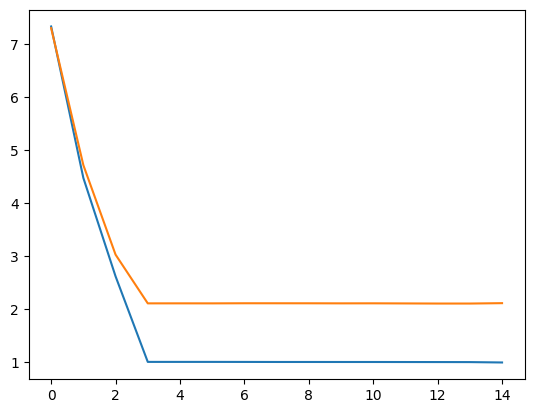

In [ ]:

Loss_lst = []
Loss_test = []
for p in range(15):
  pred = prediction(X_train, y_train, X_train, p)
  Loss = loss(y_train, pred)
  Loss_lst.append(Loss)
  Pred_t = prediction(X_train, y_train, X_test, p)
  Loss_t = loss(y_test, Pred_t)
  Loss_test.append(Loss_t)

plt.plot(range(15), Loss_lst)
plt.plot(range(15), Loss_test)